
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [51]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Load data in dataframe
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df_train.shape

(891, 12)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
#Find the average age of those who survived and those who did not
df_train.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [56]:
#pip install missingno

In [57]:
import missingno as msno

<AxesSubplot:>

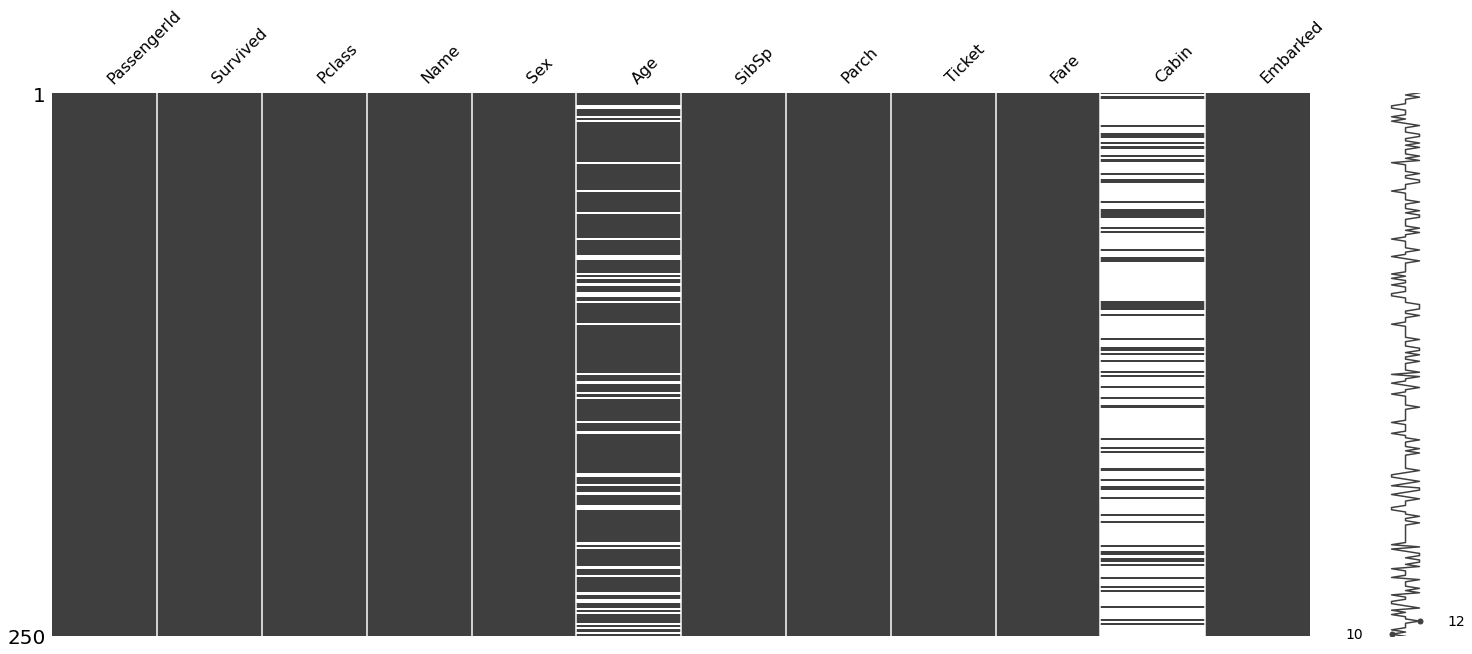

In [58]:
%matplotlib inline
msno.matrix(df_train.sample(250))

<AxesSubplot:>

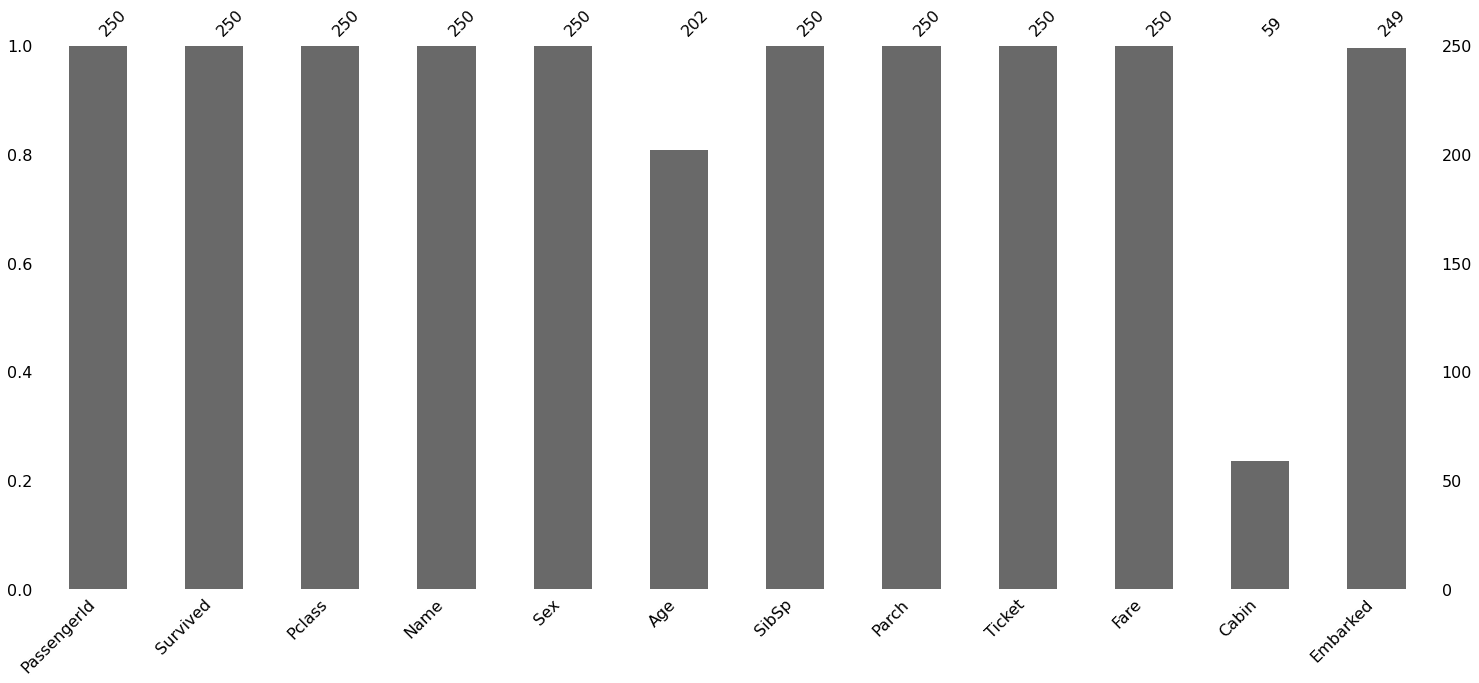

In [59]:
msno.bar(df_train.sample(250))

<AxesSubplot:>

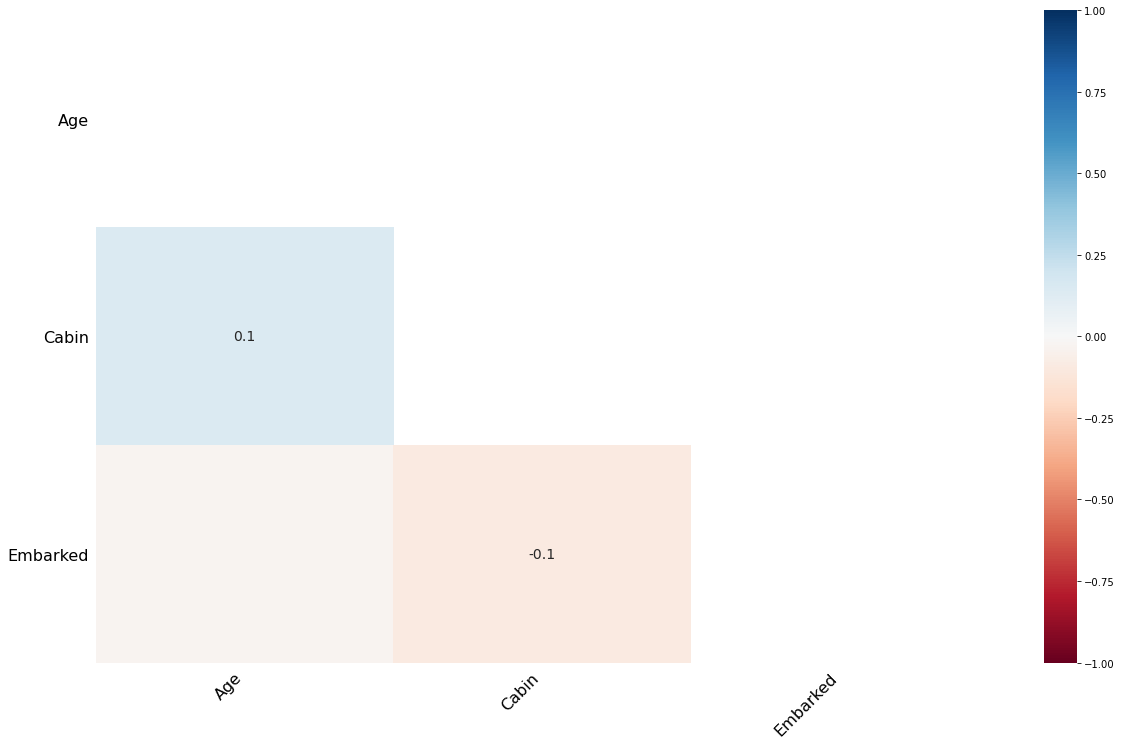

In [60]:
msno.heatmap(df_train)

Text(0, 0.5, 'Field Name')

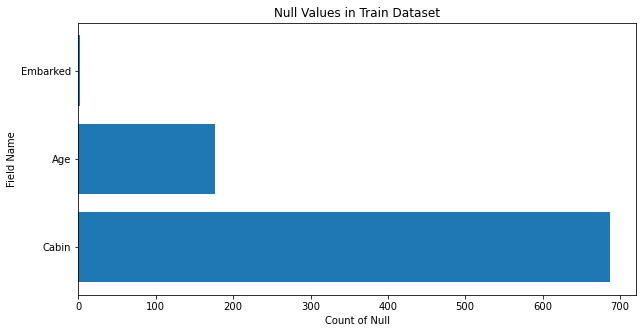

In [61]:
#Your code here  (not using hte missingno)
#1 Create a bar chart showing how many missing values are in each column
null_values =  df_train.isna().sum().sort_values(ascending=False)


#filter only the one with non-zero
nv  = null_values[null_values > 0]

plt.figure(figsize=(10,5))
plt.barh(nv.index, nv.values)
plt.title("Null Values in Train Dataset")
plt.xlabel("Count of Null")
plt.ylabel("Field Name")


In [62]:
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [63]:
#Your code here 
print(f'The field {nv.index[0]} with {nv[0]} null-values')

The field Cabin with 687 null-values


In [64]:
#Your code here 
#3 Delete all rows where Embarked is empty
df_train.dropna(subset= ['Embarked'], inplace=True)


In [65]:
#Your code here 
#4 Fill all empty cabins with ¯\(ツ)/¯

df_train['Cabin'].fillna('¯\\_(ツ)_/¯', inplace=True)
df_train['Cabin'].unique()

array(['¯\\_(ツ)_/¯', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
    

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [67]:
#Your code here 
#Two columns, not sure which is the other one?
df_train['FamilyCount'] = df_train['SibSp'] + df_train['Parch']

In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0


In [69]:
#Your code here 
#new field IsReverend
df_train['IsReverend'] = df_train['Name'].map(lambda x: 1 if x.find('Rev') >= 0 else 0)

In [70]:
#check the data that was tagged as 1
df_train[df_train['IsReverend'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\_(ツ)_/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\_(ツ)_/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\_(ツ)_/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\_(ツ)_/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\_(ツ)_/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\_(ツ)_/¯,S,0,1


In [71]:
#Your code here 
#dummy [embarked]
df_train = pd.get_dummies(df_train, columns= ['Embarked'], prefix = 'Embarked')

In [72]:
#Your code here 
#dummy [Sex]
df_train = pd.get_dummies(df_train, columns = ['Sex'], prefix = 'Sex')

In [73]:
#Your code here 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        889 non-null    object 
 10  FamilyCount  889 non-null    int64  
 11  IsReverend   889 non-null    int64  
 12  Embarked_C   889 non-null    uint8  
 13  Embarked_Q   889 non-null    uint8  
 14  Embarked_S   889 non-null    uint8  
 15  Sex_female   889 non-null    uint8  
 16  Sex_male     889 non-null    uint8  
dtypes: float64(2), int64(7), object(3), uint8(5)
memory usage: 94.6+ KB


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [74]:
#Your code here 
#What was the survival rate overall?

survival_rate = df_train.groupby('Survived')['PassengerId'].count()/len(df_train)

print(f'There are {round(survival_rate[0],2) * 100}% who did not survived and {round(survival_rate[1],2) * 100}% made it alive')

There are 62.0% who did not survived and 38.0% made it alive


In [75]:
#dataset that filters survival passengers only
df_train_survived = df_train[df_train['Survived'] ==1]

In [76]:
#Which gender fared the worst? What was their survival rate?

print(f"Female Survival Rate: {round(df_train_survived['Sex_female'].sum()/len(df_train) * 100,2)} %")
print(f"Male Survival Rate: {round(df_train_survived['Sex_male'].sum()/len(df_train) * 100,2)} %")

Female Survival Rate: 25.98 %
Male Survival Rate: 12.26 %


In [77]:
#Your code here 
#What was the survival rate for each Pclass?

p_class_survival_rate = df_train_survived.groupby(['Pclass'])['PassengerId'].count()/len(df_train) 

print(f"Class 1 has the highest survival rate of {round(p_class_survival_rate.loc[1] * 100,2)} %")

Class 1 has the highest survival rate of 15.07 %


In [78]:
#Your code here 
#Did any reverends survive? How many?
rev_survival = df_train_survived[ df_train_survived['IsReverend'] == 1 ]

#none survived
print('No of Reverend who survived:', len(rev_survival))

No of Reverend who survived: 0


In [79]:
#Your code here 
#What is the survival rate for cabins marked ¯\(ツ)/¯
cabin_dummy_survival_rate = len(df_train_survived[df_train_survived['Cabin'] == '¯\\_(ツ)_/¯'])/len(df_train) 


print(f'Survival rate for cabins marked ¯\(ツ)/¯:  {round(cabin_dummy_survival_rate*100,2)} % ')

Survival rate for cabins marked ¯\(ツ)/¯:  23.17 % 


In [80]:
#Your code here 
#What is the survival rate for people whose Age is empty?
#df_train_survived['Age'].value_counts()

age_nan_survival_rate = len(df_train_survived[pd.isnull(df_train_survived['Age'])])/len(df_train)


print(f'Survival rate for people whose Age is empty:  {round(age_nan_survival_rate*100,2)} % ')

Survival rate for people whose Age is empty:  5.85 % 


In [82]:
#Your code here 
#What is the survival rate for each port of embarkation?

print(f"Survival rate for Embarked_C:  {round(df_train_survived['Embarked_C'].sum()/len(df_train)*100,2)} % ")
print(f"Survival rate for Embarked_Q:  {round(df_train_survived['Embarked_Q'].sum()/len(df_train)*100,2)} % ")
print(f"Survival rate for Embarked_S:  {round(df_train_survived['Embarked_S'].sum()/len(df_train)*100,2)} % ")

Survival rate for Embarked_C:  10.46 % 
Survival rate for Embarked_Q:  3.37 % 
Survival rate for Embarked_S:  24.41 % 


In [83]:
#Your code here 
#What is the survival rate for children (under 12) in each Pclass?
age_below_12_survival_rate = len(df_train_survived[df_train_survived['Age'] < 12]) /len(df_train)

print(f"Survival rate for Embarked_S:  {round(age_below_12_survival_rate*100,2)} % ")

Survival rate for Embarked_S:  4.39 % 


In [84]:
#Your code here 
#Did the captain of the ship survive? Is he on the list?
captain = df_train[df_train['Name'].map(lambda x: True if x.find('Capt') >= 0 else False)][['Survived', 'Name']].values[0]
if captain[0]:
    print(f"Captain {captain[1]} survived")
else:
    print(f"Captain {captain[1]} did not survived")



Captain Crosby, Capt. Edward Gifford did not survived


In [85]:
#Your code here 
#Of all the people that died, who had the most expensive ticket? How much did it cost?
df_train[df_train['Survived']==0][['Fare','Name']].sort_values(by="Fare", ascending=False).iloc[0]

Fare                             263.0
Name    Fortune, Mr. Charles Alexander
Name: 27, dtype: object

In [86]:
#Your code here 
#Does having family on the boat help or hurt your chances of survival?
family_survival_rate = len(df_train_survived[df_train_survived['FamilyCount'] > 0])/len(df_train)
nofamily_survival_rate = len(df_train_survived[df_train_survived['FamilyCount'] == 0])/len(df_train)

print(f"Survival rate with Family on board:  {round(family_survival_rate*100,2)} % ")
print(f"Survival rate w/o Family:  {round(nofamily_survival_rate*100,2)} % ")

Survival rate with Family on board:  20.13 % 
Survival rate w/o Family:  18.11 % 


In [87]:
def is_child(df):
    
    age , female, male = df
    if age < 16:
        return 'child'
    elif female:
        return 'female'
    elif male:
        return 'male'
    
df_train['person'] = df_train[['Age','Sex_female', 'Sex_male']].apply(is_child,axis=1)

In [88]:
df_train['hasFamily'] = df_train['FamilyCount'].map(lambda x: 1 if x > 0 else 0)


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


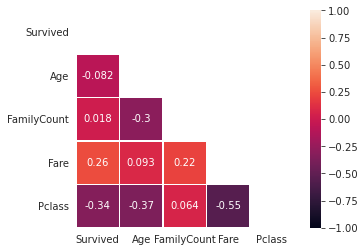

In [102]:
#Your code here 
#PLOT001
#this is to check the correlation for some selected fields

df_train_selected = df_train[['Survived', 'Age', 'FamilyCount', 'Fare', 'Pclass']]
# 1) Correlation Analysis
correl = df_train_selected.corr()

mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True

# Plot this correlation

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(correl, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

#the fare has the strongest correlation with Survival at 26%

<AxesSubplot:>

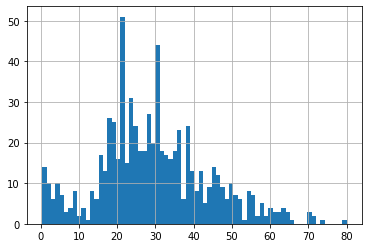

In [108]:
#PLOT002

df_train['Age'].hist(bins=70)
#distribution of age (20s and 30s are the highest)

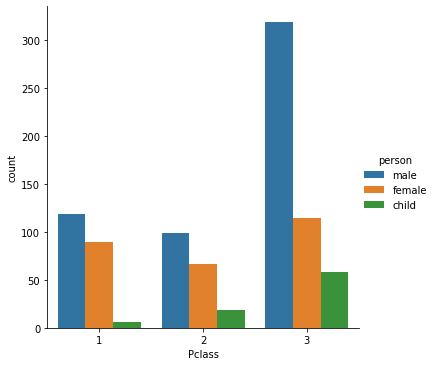

In [110]:
#Your code here 
#PLOT003
#survived, class, 
sns.catplot(x='Pclass',data=df_train,hue='person',kind='count');

#Pclass of 3 have the highest count of passengers

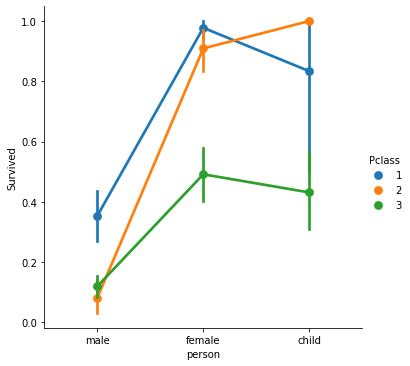

In [111]:
#PLOT004
sns.catplot(x="person", y="Survived", hue="Pclass", kind="point", data=df_train)

#Pclass of 1 have higher rate of survival except for make and female, and Pclass of 2 for children

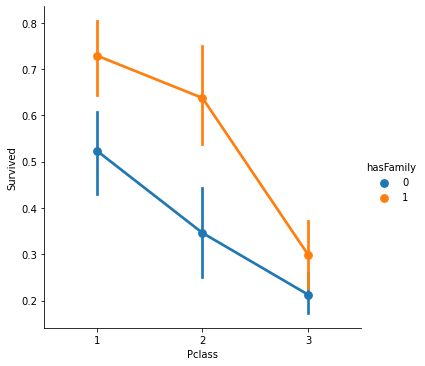

In [112]:
#PLOT005
sns.catplot(x='Pclass',y='Survived',data=df_train,hue='hasFamily',kind="point");
#shows here that passsengers with Family has higher rate of survival

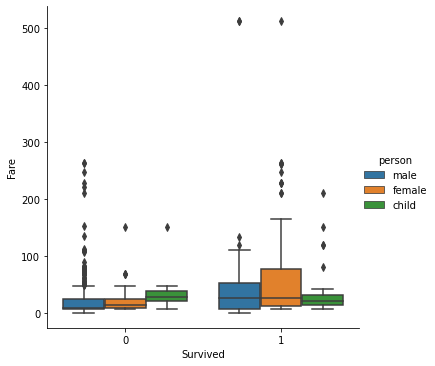

In [105]:
#Your code here 
#boxplot (age, survived, not survived, including child)
sns.catplot(x="Survived", y='Fare', kind="box", hue="person",data=df_train);

#what does this boxplot means?

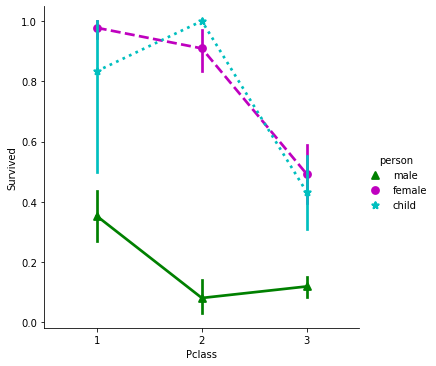

In [113]:
#just another interpretation (the same as PLOT004)
sns.catplot(x="Pclass", y="Survived", hue="person",
            palette={"male": "g", "female": "m", "child":"c"},
            markers=["^", "o", "*"], linestyles=["-", "--", ":"],
            kind="point", data=df_train)